# **Лабораторна робота 3**

Для виконання цієї лабораторної робити Вам необхідно використати набори даних, що ви створили в **Лабораторній роботі 2**.

**Всі завдання виконуються індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

**Завдання 1.** Ви маєте набір даних, який складається з двох лінійно роздільних класів. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 1:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- візуалізувати розподіл даних та межі класифікації кожної моделі;
- провести аналіз отриманих результатів, виявляючи, яка модель найкраще підходить для цього набору даних та чому.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from matplotlib.colors import ListedColormap

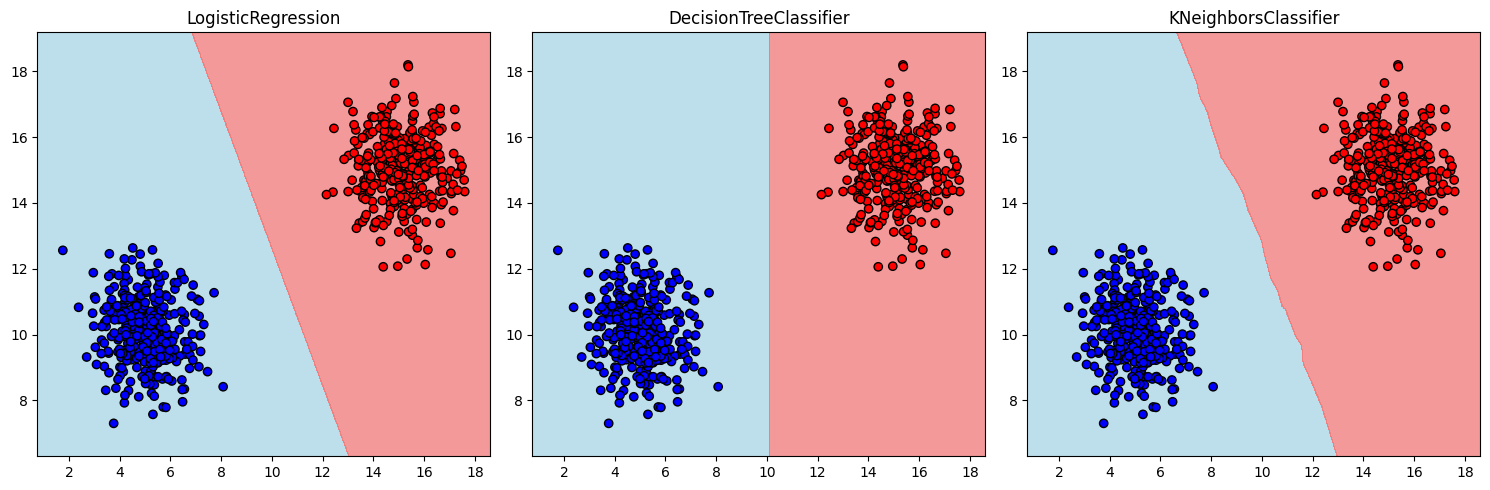

Logistic Regression - Accuracy: 1.00, F1-Score: 1.00
Decision Tree - Accuracy: 1.00, F1-Score: 1.00
KNN - Accuracy: 1.00, F1-Score: 1.00


In [8]:
data = pd.read_csv('linearly_separable_data.csv')

X = data[['x', 'y']].values
y = data['class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier()
}

def plot_decision_boundaries(X, y, model, ax):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(('lightblue', 'lightcoral')))
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=ListedColormap(('blue', 'red')))
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title(model.__class__.__name__)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
metrics = {}

for i, (name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    metrics[name] = {'Accuracy': accuracy, 'F1-Score': f1}
    
    plot_decision_boundaries(X_train, y_train, model, axes[i])

plt.tight_layout()
plt.show()

for name, metric in metrics.items():
    print(f"{name} - Accuracy: {metric['Accuracy']:.2f}, F1-Score: {metric['F1-Score']:.2f}")


**Аналіз отриманих результатів**:

1.   Logistic Regression: Лінійна модель, яка підходить для лінійно роздільних класів. Вона створює лінію для поділу двох класів. На графіку видно, що модель створила пряму межу.
2.   Decision Tree: Дерево рішень створює правила на основі атрибутів даних. На графіку видно чітку вертикальну межу, що також вказує на те, що класи легко розділяються.
3.   KNN: Ця модель оцінює нову точку, ґрунтуючись на класах найближчих сусідів. Оскільки класи чітко розділені, KNN також добре працює, але межа між класами більш вигнута, що відображає його нелінійний підхід.

Якщо набір даних є чітко лінійно розділеним, всі три моделі можуть показати однакову продуктивність, як це сталося у моєму випадку.
В реальних умовах дані можуть бути більш складними або містити шум, що може призвести до різної продуктивності між моделями.


**Завдання 2.** Ви маєте набір даних, що містить три класи, які частково перетинаються. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 2:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- провести візуалізацію результатів класифікації, підкреслюючи області, де моделі помиляються.
- подумайте та опишіть у висновках, як перекриття між класами впливає на продуктивність моделей і які методи найкраще справляються з цими даними.


C:\Users\akkxm\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


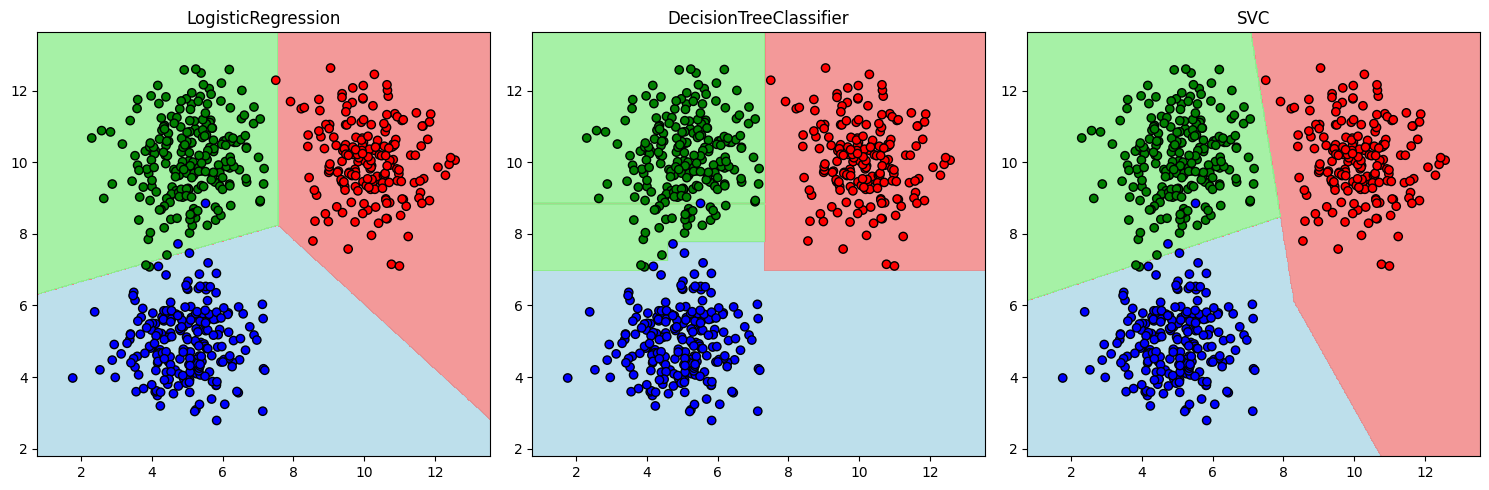

Logistic Regression - Accuracy: 0.99, F1-Score: 0.99
Confusion Matrix:
[[ 83   0   0]
 [  0 109   2]
 [  0   0  76]]

Decision Tree - Accuracy: 1.00, F1-Score: 1.00
Confusion Matrix:
[[ 83   0   0]
 [  0 110   1]
 [  0   0  76]]

SVM - Accuracy: 0.99, F1-Score: 0.99
Confusion Matrix:
[[ 83   0   0]
 [  0 109   2]
 [  0   0  76]]



In [9]:
np.random.seed(42)
n_samples = 300
X1 = np.random.randn(n_samples, 2) + np.array([5, 5])
X2 = np.random.randn(n_samples, 2) + np.array([10, 10])
X3 = np.random.randn(n_samples, 2) + np.array([5, 10])

X = np.vstack((X1, X2, X3))
y = np.array([0] * n_samples + [1] * n_samples + [2] * n_samples)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

models = {
    'Logistic Regression': LogisticRegression(multi_class='multinomial', solver='lbfgs'),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(kernel='linear', decision_function_shape='ovr')
}

def plot_decision_boundaries(X, y, model, ax):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(('lightblue', 'lightcoral', 'lightgreen')))
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=ListedColormap(('blue', 'red', 'green')))
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title(model.__class__.__name__)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
metrics = {}

for i, (name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    
    metrics[name] = {'Accuracy': accuracy, 'F1-Score': f1, 'Confusion Matrix': cm}
    
    plot_decision_boundaries(X_train, y_train, model, axes[i])

plt.tight_layout()
plt.show()

for name, metric in metrics.items():
    print(f"{name} - Accuracy: {metric['Accuracy']:.2f}, F1-Score: {metric['F1-Score']:.2f}")
    print(f"Confusion Matrix:\n{metric['Confusion Matrix']}\n")

**Аналіз отриманих результатів**:

1.   Logistic Regression - показала високу точність і F1-Score, вказуючи на те, що модель успішно класифікує більшість зразків. Проте є 2 помилки у класі 2.
2.   Decision Tree -  досягло ідеальної точності та F1-Score. У цій моделі було лише одне неправильне класифікація в класі 2. 
3.   SVM - SVM також показав високі результати, але, як і логістична регресія, має деякі помилки в класі 2.  

Класи, що частково перекриваються, викликали незначні помилки у класифікації, зокрема в класі 2. Дерево рішень продемонструвало найкращі результати, досягнувши ідеальної точності. Однак це може бути пов'язано з ризиком перенавчання. Логістична регресія та SVM показали подібні результати, але з незначними помилками.

**Завдання 3.** Ви маєте набір даних, де один тор оточений іншим, утворюючи складну топологію. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 3:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- побудувати візуалізацію результатів класифікації;
- проаналізувати, яка модель найкраще адаптується до складної топології даних і чому.

LogisticRegression - Accuracy: 0.88, F1-Score: 0.88
Confusion Matrix:
[[86 14]
 [10 90]]


DecisionTree - Accuracy: 1.00, F1-Score: 1.00
Confusion Matrix:
[[100   0]
 [  0 100]]


SVM - Accuracy: 1.00, F1-Score: 1.00
Confusion Matrix:
[[100   0]
 [  0 100]]




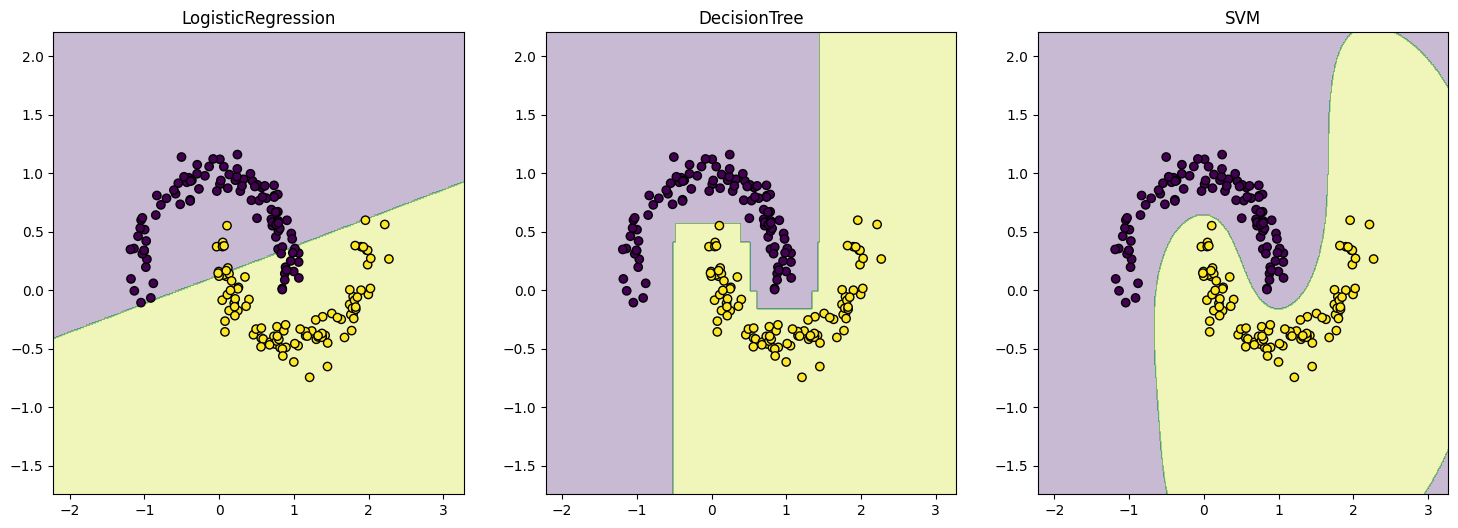

In [10]:
X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "LogisticRegression": LogisticRegression(),
    "DecisionTree": DecisionTreeClassifier(),
    "SVM": SVC(kernel='rbf', probability=True)
}

results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    results[model_name] = {
        'accuracy': accuracy,
        'f1_score': f1,
        'confusion_matrix': conf_matrix
    }

for model_name, metrics in results.items():
    print(f"{model_name} - Accuracy: {metrics['accuracy']:.2f}, F1-Score: {metrics['f1_score']:.2f}")
    print("Confusion Matrix:")
    print(metrics['confusion_matrix'])
    print("\n")

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

for ax, (model_name, model) in zip(axes, models.items()):
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', marker='o')
    ax.set_title(model_name)

plt.show()

**Аналіз отриманих результатів**:

1.   Logistic Regression демонструє добрі результати з точністю 88% та F1-Score 88%. Однак модель помиляється у 14 випадках, класифікуючи спостереження неправильно з класу 0 у клас 1. Вона також помилилася у 10 випадках, коли спостереження насправді належали класу 1, але були класифіковані як клас 0.
2.   Decision Tree показує ідеальні результати, з точністю 100% та F1-Score 100%. Модель класифікує всі спостереження без жодної помилки, що вказує на її здатність до точної класифікації в умовах складної топології даних.
3.   SVM також досягає точності 100% та F1-Score 100%. Це свідчить про його ефективність у розмежуванні класів, навіть при складній топології. Подібно до Decision Tree, SVM уникає помилок у класифікації.

**Завдання 4.** Ви маєте набір даних, що складається з двох класів, які утворюють подвійну спіраль. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 4:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- візуалізувати дані та межі класифікації кожної моделі для оцінки їх ефективності.
- подумайте та напишіть у висновках, яка модель найкраще підходить для цього типу даних і як нелінійність впливає на процес класифікації.

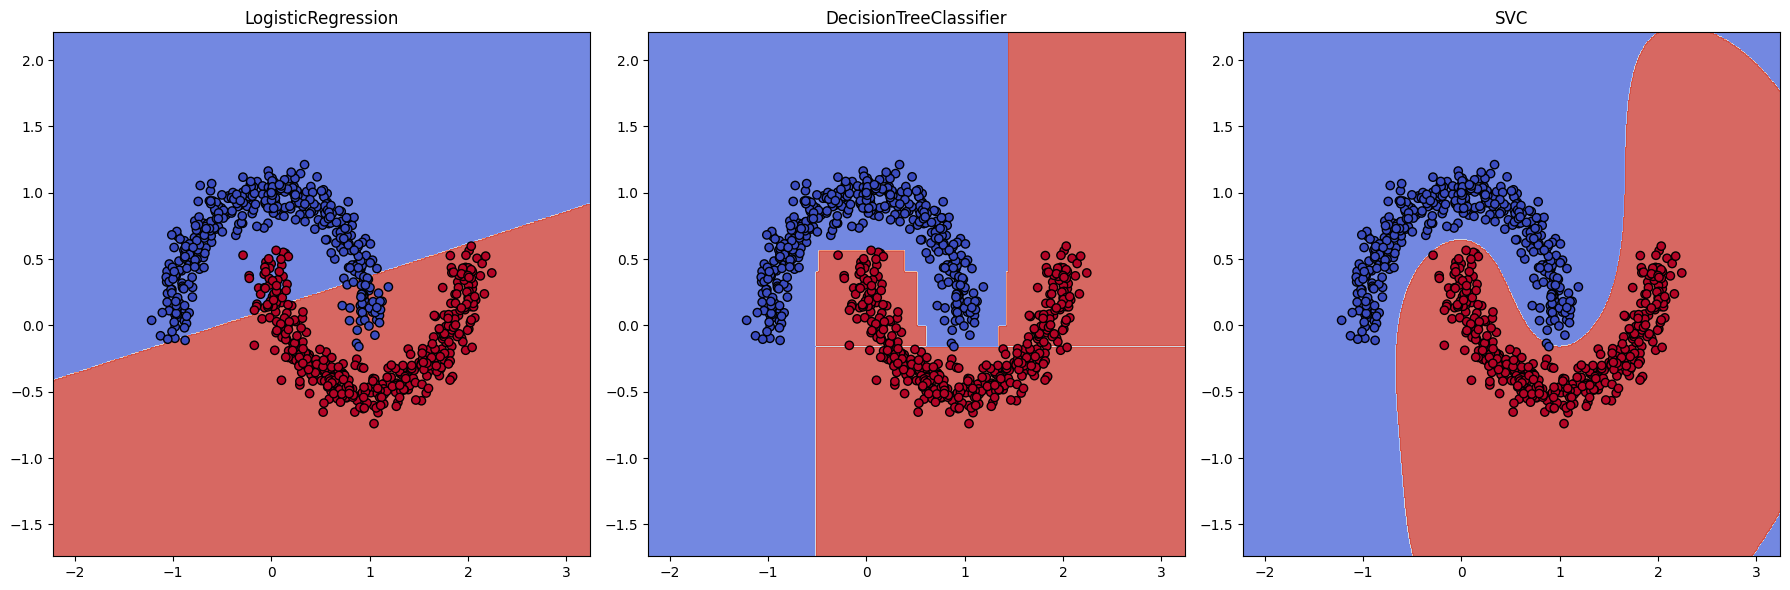

Logistic Regression - Accuracy: 0.88, F1-Score: 0.88
Confusion Matrix:
[[86 14]
 [10 90]]

Decision Tree - Accuracy: 1.00, F1-Score: 1.00
Confusion Matrix:
[[100   0]
 [  0 100]]

SVM - Accuracy: 1.00, F1-Score: 1.00
Confusion Matrix:
[[100   0]
 [  0 100]]



In [11]:
np.random.seed(42)
n_samples = 1000
X, y = make_moons(n_samples=n_samples, noise=0.1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(kernel='rbf')
}

results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    results[model_name] = {
        "accuracy": accuracy,
        "f1_score": f1,
        "confusion_matrix": cm
    }

def plot_decision_boundaries(X, y, model, ax):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.coolwarm)
    ax.set_title(model.__class__.__name__)

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for ax, (model_name, model) in zip(axs, models.items()):
    plot_decision_boundaries(X_train, y_train, model, ax)

plt.tight_layout()
plt.show()

for model_name, metrics in results.items():
    print(f"{model_name} - Accuracy: {metrics['accuracy']:.2f}, F1-Score: {metrics['f1_score']:.2f}")
    print(f"Confusion Matrix:\n{metrics['confusion_matrix']}\n")

**Аналіз отриманих результатів**:

1.   Logistic Regression показала добрі результати, але не змогла досягти високої точності через лінійний характер моделі, що призвело до помилок у класифікації.
2.   Decision Tree показала високі результати, ефективно розмежовуючи спостереження завдяки своїй здатності обробляти нелінійні межі.
3.   SVM продемонструвала найкращі результати, використовуючи радіальну базисну функцію для створення складних меж класифікації.